### Import von .csv ins Dataframe - Wegahome 26.3 bis 30.9.
### PV, BS, LS, WP, Verbrauch, Netzeinspeisung

In [1]:
import pandas as pd
import glob
import re

# Pfad zu den CSV-Dateien
csv_files = glob.glob(r'C:\Users\DianaEspinosaLozano\anaconda3\envs\thesis\1_Essen\*.csv')

# Funktion zum Extrahieren des Startdatums aus dem Dateinamen (für die Sortierung)
def extract_date(file_name):
    match = re.search(r'(\d{2}-\d{2}-\d{4})', file_name)
    return pd.to_datetime(match.group(1), dayfirst=True) if match else None

# Sortiere die Dateien nach Datum
csv_files_sorted = sorted(csv_files, key=extract_date)

# Leere Liste zum Speichern der DataFrames
df_list = []

# Jede CSV-Datei einlesen und in die Liste hinzufügen
for file in csv_files_sorted:
    try:
        # Lies die Datei ein, überspringe die erste Zeile, und erkenne Komma als Dezimalzeichen
        df = pd.read_csv(file, sep=",", decimal=",", skiprows=1, index_col=None)
        df_list.append(df)
    except Exception as e:
        print(f"Fehler beim Einlesen der Datei {file}: {e}")

# Überprüfen, ob DataFrames erfolgreich geladen wurden
if df_list:
    # Alle DataFrames in der Liste zu einem einzigen DataFrame zusammenführen
    merged_df = pd.concat(df_list, ignore_index=True)
    
    # Den zusammengeführten DataFrame anzeigen oder weiter verwenden
    print("Zusammengeführter DataFrame:")
    print(merged_df.head())
    print("Spaltennamen des zusammengeführten DataFrames:", merged_df.columns)
else:
    print("Es konnten keine DataFrames aus den CSV-Dateien geladen werden.")


Zusammengeführter DataFrame:
             measuredAt  Gesamte Netzeinspeisung (Wh)  \
0  2024-03-25T23:15:00Z                           0.0   
1  2024-03-25T23:30:00Z                           0.0   
2  2024-03-25T23:45:00Z                           0.0   
3  2024-03-26T00:00:00Z                           0.0   
4  2024-03-26T00:15:00Z                           0.0   

   Gesamter Netzbezug (Wh)  PV (Wh)  Batterieladung (Wh)  \
0                 1189.110      0.0                  0.0   
1                 1167.424      0.0                  0.0   
2                 1141.256      0.0                  0.0   
3                 1086.983      0.0                  0.0   
4                 1031.405      0.0                  0.0   

   Batterieentladung (Wh)  Batterie SoC  EV (Wh)  Haushalt (Wh)  \
0                     0.0          0.05      0.0        135.800   
1                     0.0          0.05      0.0        123.890   
2                     0.0          0.05      0.0        140.533   

In [17]:
merged_df

,Gesamte Netzeinspeisung (Wh),Gesamter Netzbezug (Wh),PV (Wh),Batterieladung (Wh),Batterieentladung (Wh),Batterie SoC,EV (Wh),Haushalt (Wh),Verbrauch (Wh),Wärmepumpe (Wh)
measuredAt,,,,,,,,,,
2024-03-25 23:15:00+00:00,0.0,1189.110,0.0,0.0,0.000,0.05,0.0,135.800,1189.110,1053.309
2024-03-25 23:30:00+00:00,0.0,1167.424,0.0,0.0,0.000,0.05,0.0,123.890,1167.424,1043.534
2024-03-25 23:45:00+00:00,0.0,1141.256,0.0,0.0,0.000,0.05,0.0,140.533,1141.256,1000.723
2024-03-26 00:00:00+00:00,0.0,1086.983,0.0,0.0,0.000,0.05,0.0,126.402,1086.983,960.580
2024-03-26 00:15:00+00:00,0.0,1031.405,0.0,0.0,0.000,0.05,0.0,125.792,1031.405,905.612
...,...,...,...,...,...,...,...,...,...,...
2024-09-30 21:00:00+00:00,0.0,830.459,0.0,0.0,9.940,0.10,0.0,166.731,840.399,673.668
2024-09-30 21:15:00+00:00,0.0,860.012,0.0,0.0,9.896,0.10,0.0,181.660,869.908,688.248
2024-09-30 21:30:00+00:00,0.0,843.465,0.0,0.0,9.943,0.10,0.0,153.592,853.408,699.816


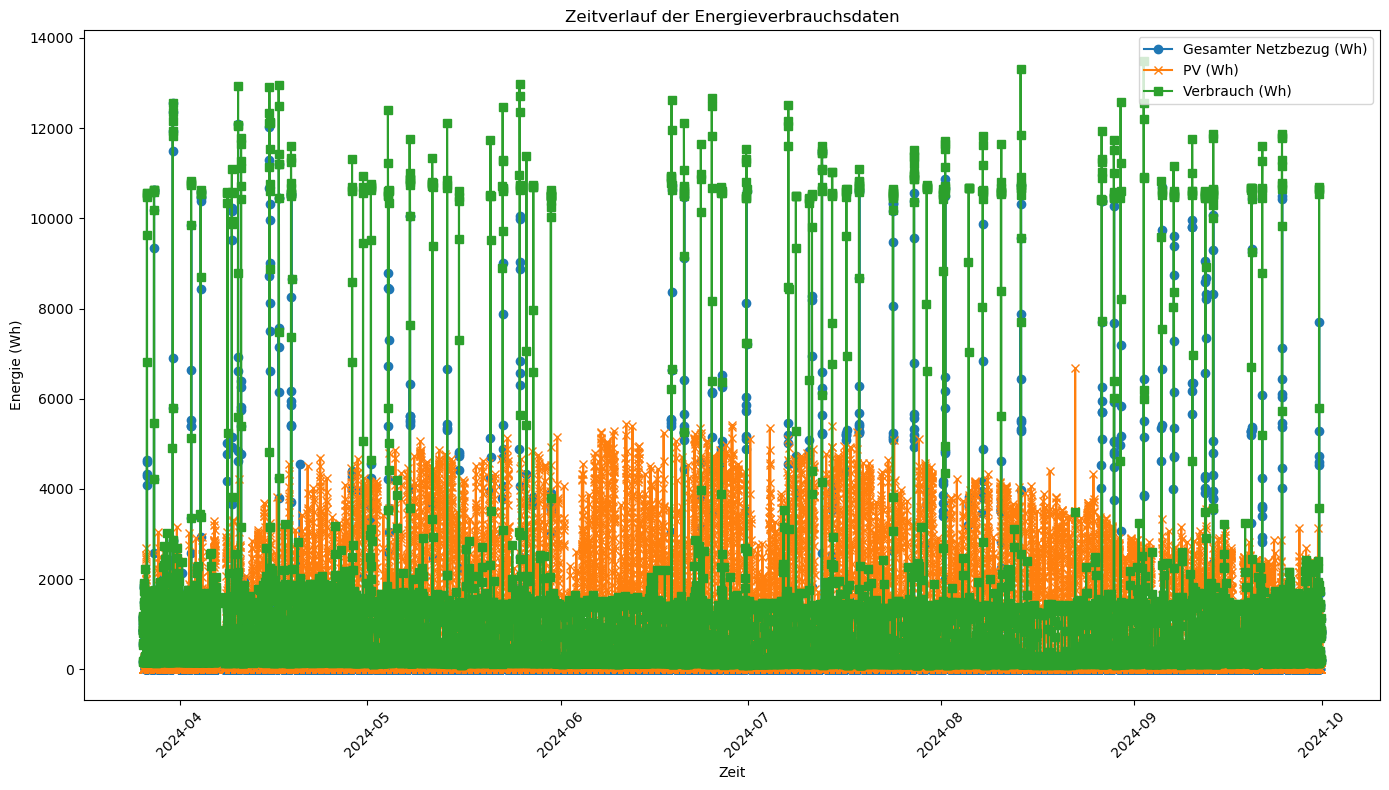

In [3]:
import matplotlib.pyplot as plt

# Konvertiere die 'measuredAt'-Spalte in ein datetime-Format
merged_df['measuredAt'] = pd.to_datetime(merged_df['measuredAt'])

# Setze 'measuredAt' als Index, um die Zeitachsen-Daten korrekt zu plotten
merged_df.set_index('measuredAt', inplace=True)

# Plot der verschiedenen Spalten
plt.figure(figsize=(14, 8))

# Beispiel: Plot für die Spalte "Gesamter Netzbezug (Wh)"
plt.plot(merged_df.index, merged_df['Gesamter Netzbezug (Wh)'], label='Gesamter Netzbezug (Wh)', marker='o')
plt.plot(merged_df.index, merged_df['PV (Wh)'], label='PV (Wh)', marker='x')
plt.plot(merged_df.index, merged_df['Verbrauch (Wh)'], label='Verbrauch (Wh)', marker='s')

# Diagramm-Einstellungen
plt.title('Zeitverlauf der Energieverbrauchsdaten')
plt.xlabel('Zeit')
plt.ylabel('Energie (Wh)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
merged_df

,Gesamte Netzeinspeisung (Wh),Gesamter Netzbezug (Wh),PV (Wh),Batterieladung (Wh),Batterieentladung (Wh),Batterie SoC,EV (Wh),Haushalt (Wh),Verbrauch (Wh),Wärmepumpe (Wh)
measuredAt,,,,,,,,,,
2024-03-25 23:15:00+00:00,0.0,1189.110,0.0,0.0,0.000,0.05,0.0,135.800,1189.110,1053.309
2024-03-25 23:30:00+00:00,0.0,1167.424,0.0,0.0,0.000,0.05,0.0,123.890,1167.424,1043.534
2024-03-25 23:45:00+00:00,0.0,1141.256,0.0,0.0,0.000,0.05,0.0,140.533,1141.256,1000.723
2024-03-26 00:00:00+00:00,0.0,1086.983,0.0,0.0,0.000,0.05,0.0,126.402,1086.983,960.580
2024-03-26 00:15:00+00:00,0.0,1031.405,0.0,0.0,0.000,0.05,0.0,125.792,1031.405,905.612
...,...,...,...,...,...,...,...,...,...,...
2024-09-30 21:00:00+00:00,0.0,830.459,0.0,0.0,9.940,0.10,0.0,166.731,840.399,673.668
2024-09-30 21:15:00+00:00,0.0,860.012,0.0,0.0,9.896,0.10,0.0,181.660,869.908,688.248
2024-09-30 21:30:00+00:00,0.0,843.465,0.0,0.0,9.943,0.10,0.0,153.592,853.408,699.816


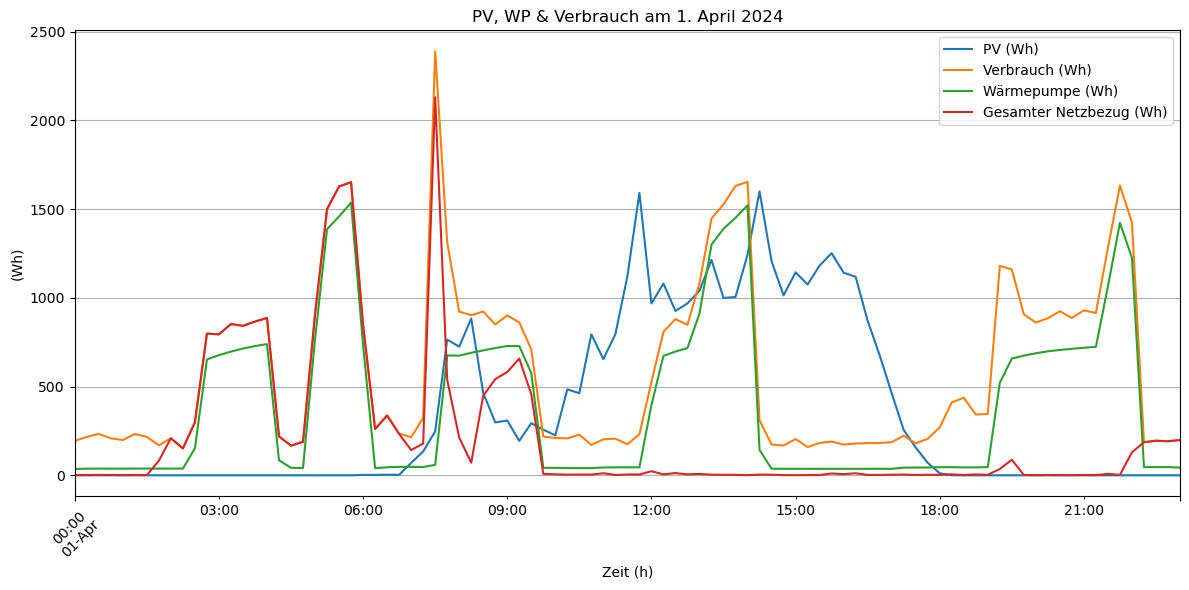

In [5]:
import matplotlib.pyplot as plt

# Sortiere den DataFrame nach dem Index (Datum und Uhrzeit)
merged_df = merged_df.sort_index()

# Definiere den gewünschten Zeitraum für den 1. April 2024
tag = merged_df.loc['2024-04-01 00:00:00':'2024-04-01 23:00:00', ['PV (Wh)', 'Verbrauch (Wh)', 'Wärmepumpe (Wh)', 'Gesamter Netzbezug (Wh)']]

# Plot für den 1. April 2024
tag_plot = tag.plot(figsize=(12, 6))
tag_plot.set_xlabel('Zeit (h)')
tag_plot.set_ylabel('(Wh)')
tag_plot.set_title('PV, WP & Verbrauch am 1. April 2024')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




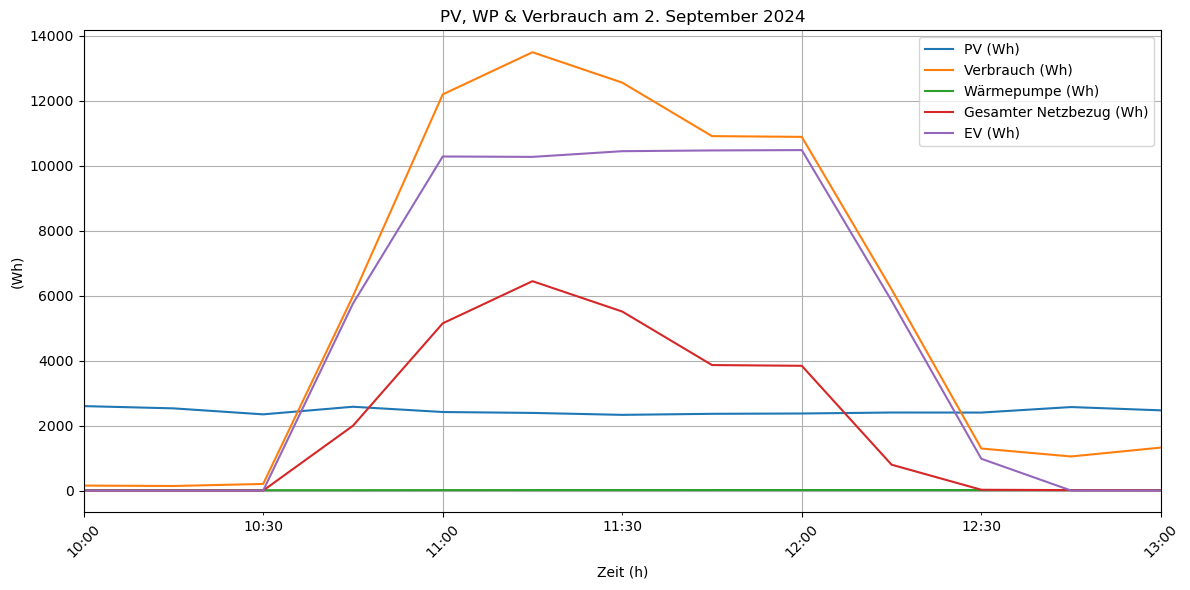

In [22]:
import matplotlib.pyplot as plt

# Sortiere den DataFrame nach dem Index (Datum und Uhrzeit)
merged_df = merged_df.sort_index()

# Definiere den gewünschten Zeitraum für den 1. April 2024
tag = merged_df.loc['2024-09-02 10:00:00':'2024-09-02 13:00:00', ['PV (Wh)', 'Verbrauch (Wh)', 'Wärmepumpe (Wh)', 'Gesamter Netzbezug (Wh)', 'EV (Wh)']]

# Plot für den 1. April 2024
tag_plot = tag.plot(figsize=(12, 6))
tag_plot.set_xlabel('Zeit (h)')
tag_plot.set_ylabel('(Wh)')
tag_plot.set_title('PV, WP & Verbrauch am 2. September 2024')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Einzeln Profile

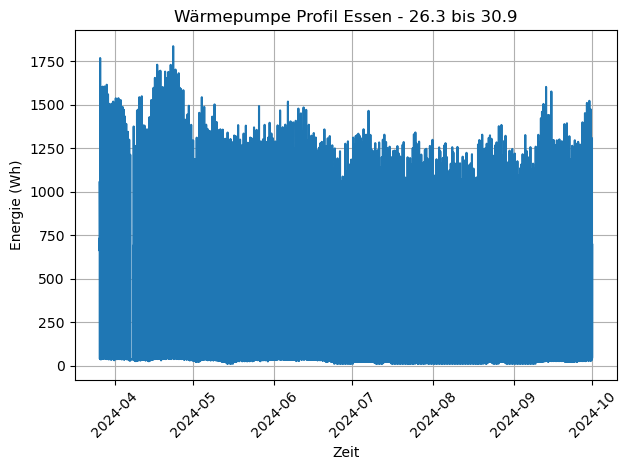

In [7]:
# 6 Monaten Profil WP

plt.plot(merged_df.index, merged_df['Wärmepumpe (Wh)'])

# Diagramm-Einstellungen
plt.title('Wärmepumpe Profil Essen - 26.3 bis 30.9')
plt.xlabel('Zeit')
plt.ylabel('Energie (Wh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

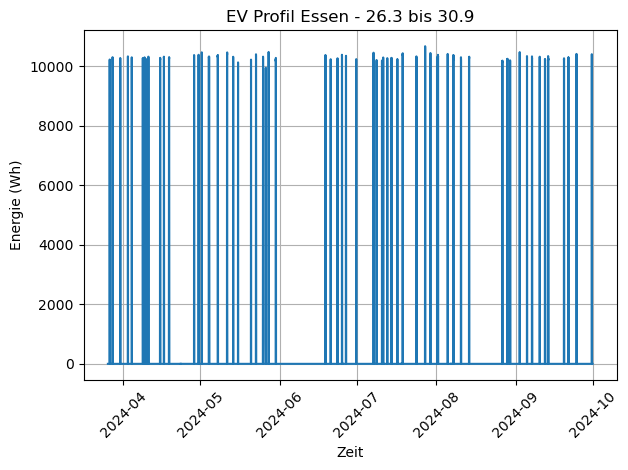

In [8]:
# 6 Monaten Profil EV

plt.plot(merged_df.index, merged_df['EV (Wh)'])

# Diagramm-Einstellungen
plt.title('EV Profil Essen - 26.3 bis 30.9')
plt.xlabel('Zeit')
plt.ylabel('Energie (Wh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

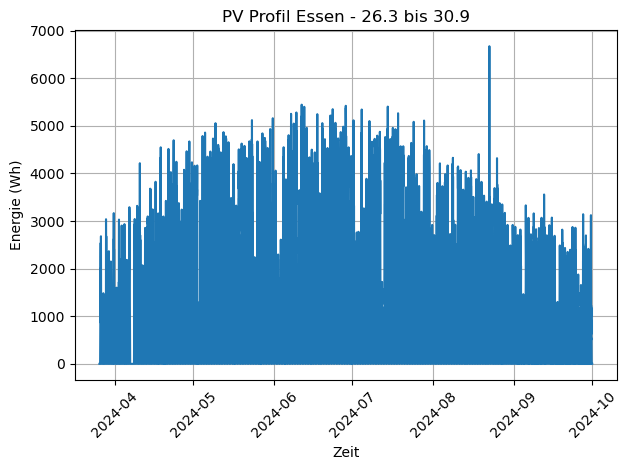

In [9]:
# 6 Monaten Profil PV (7,6 kWp)

plt.plot(merged_df.index, merged_df['PV (Wh)'])

# Diagramm-Einstellungen
plt.title('PV Profil Essen - 26.3 bis 30.9')
plt.xlabel('Zeit')
plt.ylabel('Energie (Wh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

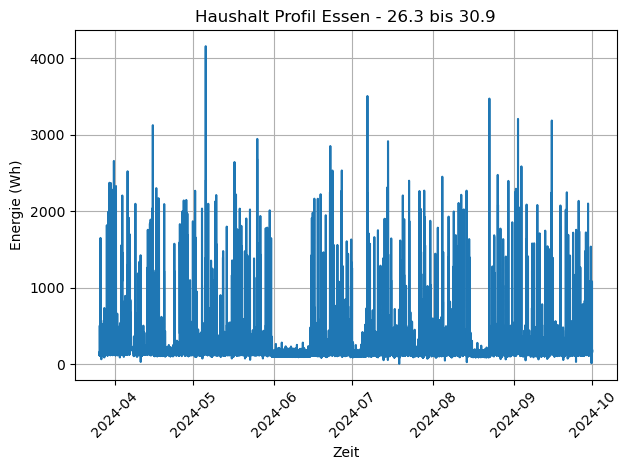

In [10]:
# 6 Monaten Profil Haushalt

plt.plot(merged_df.index, merged_df['Haushalt (Wh)'])

# Diagramm-Einstellungen
plt.title('Haushalt Profil Essen - 26.3 bis 30.9')
plt.xlabel('Zeit')
plt.ylabel('Energie (Wh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

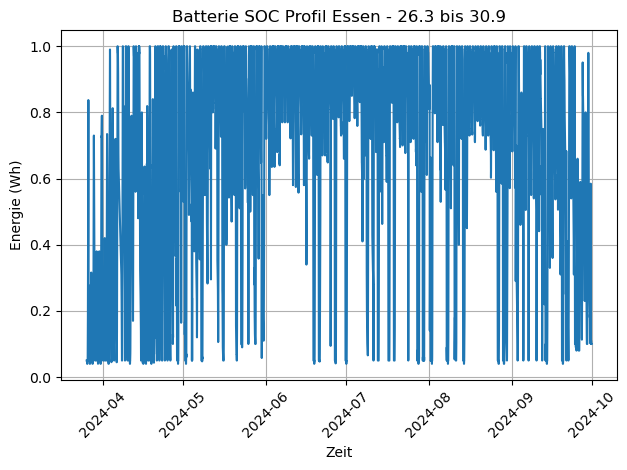

In [11]:
# 6 Monaten Profil Batterie SOC

plt.plot(merged_df.index, merged_df['Batterie SoC'])

# Diagramm-Einstellungen
plt.title('Batterie SOC Profil Essen - 26.3 bis 30.9')
plt.xlabel('Zeit')
plt.ylabel('Energie (Wh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

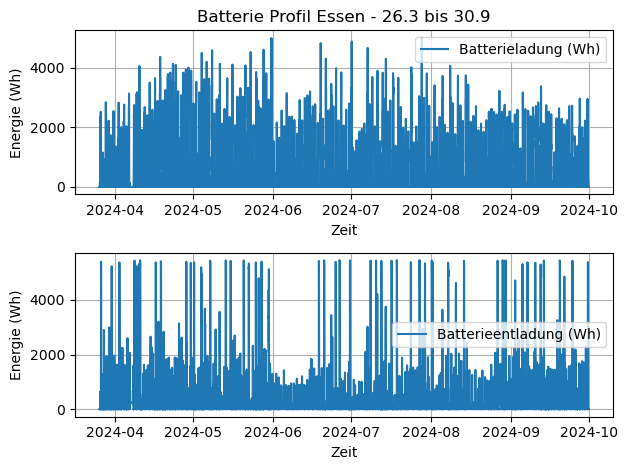

In [12]:
# 6 Monaten Profil Batterie SOC
plt.subplot(2, 1, 1)
plt.plot(merged_df['Batterieladung (Wh)'], label = 'Batterieladung (Wh)')
plt.title('Batterie Profil Essen - 26.3 bis 30.9')
plt.xlabel('Zeit')
plt.ylabel('Energie (Wh)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_df['Batterieentladung (Wh)'], label ='Batterieentladung (Wh)')
plt.xlabel('Zeit')
plt.ylabel('Energie (Wh)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Other

In [13]:
verbrauch_wp = round(sum(merged_df['Wärmepumpe (Wh)']))
pv = round(sum(merged_df['PV (Wh)']))
netzbezug = round(sum(merged_df['Gesamter Netzbezug (Wh)']))
einspeisung = round(sum(merged_df['Gesamte Netzeinspeisung (Wh)']))
ev = sum(merged_df['EV (Wh)'])
bs = round(sum(merged_df['Batterieladung (Wh)']))

print('PV-Strom in kWh: ', pv/1000)
print('Netzbezug in kWh: ', netzbezug/1000)
print('Einspeisung in kWh: ', einspeisung/1000)
print('Verbrauch WP in kWh: ', verbrauch_wp/1000)
print('Verbrauch EV in kWh: ', ev/1000)
print('Ladung BS in kWh: ', bs/1000)


PV-Strom in kWh:  17520.269
Netzbezug in kWh:  3773.625
Einspeisung in kWh:  9290.073
Verbrauch WP in kWh:  3150.316
Verbrauch EV in kWh:  nan
Ladung BS in kWh:  4927.918


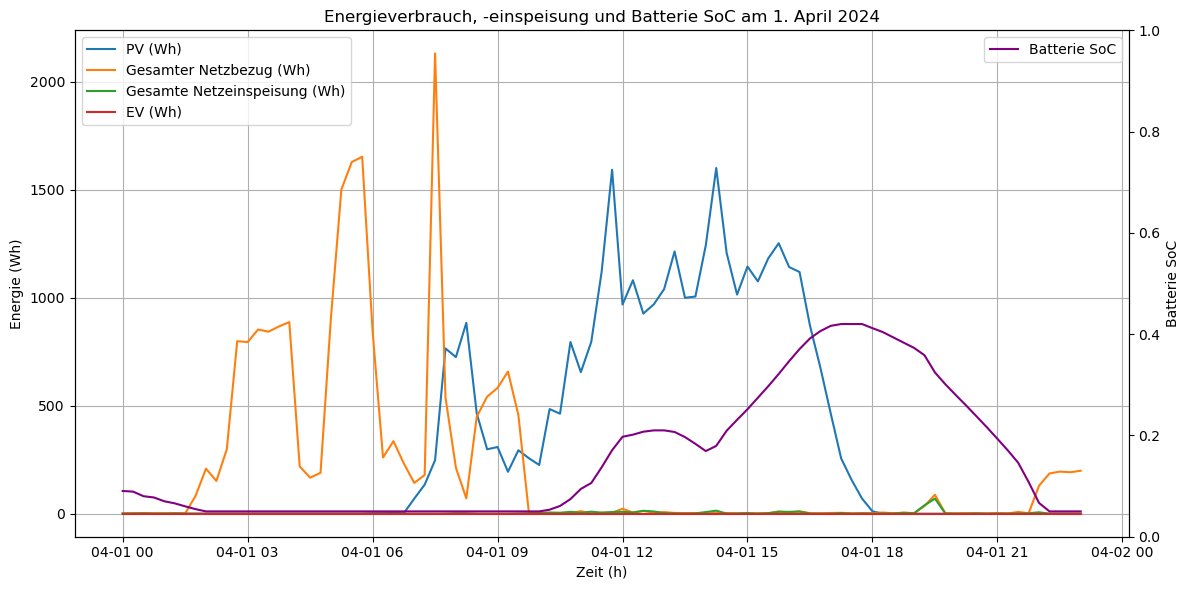

In [14]:
import matplotlib.pyplot as plt

# Definiere den gewünschten Zeitraum für den 1. April 2024
tag = merged_df.loc['2024-04-01 00:00:00':'2024-04-01 23:00:00', ['PV (Wh)', 'Gesamter Netzbezug (Wh)', 'Gesamte Netzeinspeisung (Wh)', 'EV (Wh)', 'Batterie SoC']]

# Erstelle die Hauptfigur und die linke y-Achse
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot für die Energie-Werte
ax1.plot(tag.index, tag['PV (Wh)'], label = 'PV (Wh)' )
ax1.plot(tag.index, tag['Gesamter Netzbezug (Wh)'], label = 'Gesamter Netzbezug (Wh)')
ax1.plot(tag.index, tag['Gesamte Netzeinspeisung (Wh)'], label = 'Gesamte Netzeinspeisung (Wh)')
ax1.plot(tag.index, tag['EV (Wh)'], label = 'EV (Wh)')

# Einstellungen für die linke y-Achse
ax1.set_xlabel('Zeit (h)')
ax1.set_ylabel('Energie (Wh)')
ax1.legend(loc='upper left')
ax1.grid(True)

# Erstelle die rechte y-Achse für 'Batterie SoC'
ax2 = ax1.twinx()
ax2.plot(tag.index, tag['Batterie SoC'], color = 'purple', label = 'Batterie SoC' )
ax2.set_ylabel('Batterie SoC')
ax2.set_ylim(0, 1)  # Skaliert die rechte y-Achse von 0 bis 1
ax2.legend(loc='upper right')

# Titel und weitere Einstellungen
plt.title('Energieverbrauch, -einspeisung und Batterie SoC am 1. April 2024')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


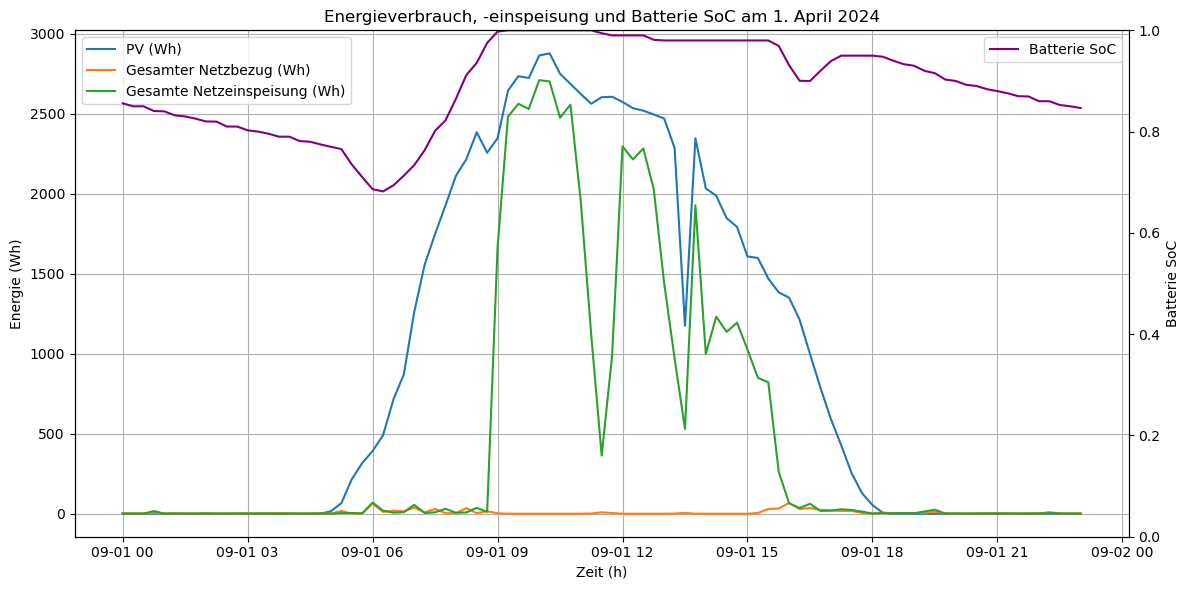

In [15]:
# Definiere den gewünschten Zeitraum für den 1. September 2024
tag = merged_df.loc['2024-09-01 00:00:00':'2024-09-01 23:00:00', ['PV (Wh)', 'Gesamter Netzbezug (Wh)', 'Gesamte Netzeinspeisung (Wh)', 'Batterie SoC']]

# Erstelle die Hauptfigur und die linke y-Achse
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot für die Energie-Werte
ax1.plot(tag.index, tag['PV (Wh)'], label = 'PV (Wh)' )
ax1.plot(tag.index, tag['Gesamter Netzbezug (Wh)'], label = 'Gesamter Netzbezug (Wh)')
ax1.plot(tag.index, tag['Gesamte Netzeinspeisung (Wh)'], label = 'Gesamte Netzeinspeisung (Wh)')

# Einstellungen für die linke y-Achse
ax1.set_xlabel('Zeit (h)')
ax1.set_ylabel('Energie (Wh)')
ax1.legend(loc='upper left')
ax1.grid(True)

# Erstelle die rechte y-Achse für 'Batterie SoC'
ax2 = ax1.twinx()
ax2.plot(tag.index, tag['Batterie SoC'], color = 'purple', label = 'Batterie SoC' )
ax2.set_ylabel('Batterie SoC')
ax2.set_ylim(0, 1)  # Skaliert die rechte y-Achse von 0 bis 1
ax2.legend(loc='upper right')

# Titel und weitere Einstellungen
plt.title('Energieverbrauch, -einspeisung und Batterie SoC am 1. April 2024')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
merged_df['EV (Wh)']

measuredAt
2024-03-25 23:15:00+00:00    0.0
2024-03-25 23:30:00+00:00    0.0
2024-03-25 23:45:00+00:00    0.0
2024-03-26 00:00:00+00:00    0.0
2024-03-26 00:15:00+00:00    0.0
                            ... 
2024-09-30 21:00:00+00:00    0.0
2024-09-30 21:15:00+00:00    0.0
2024-09-30 21:30:00+00:00    0.0
2024-09-30 21:45:00+00:00    0.0
2024-09-30 22:00:00+00:00    0.0
Name: EV (Wh), Length: 18048, dtype: float64